In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy import interpolate
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from scipy import integrate
import astropy.io.fits as fits 
import pandas as pd

F:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


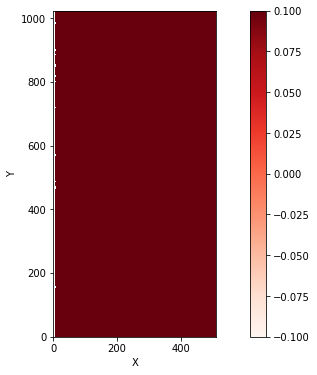

1024
456.31006
294.21515
197.79608


In [2]:
import astropy.io.fits as fits 

hdu=fits.open('aJ_asky_991004n0440185.fits')
data=hdu[0].data
header=hdu[0].header

fig=plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ax.set_xlabel('X')
ax.set_ylabel('Y')
im=ax.imshow(data,cmap='Reds',origin='low')
fig.colorbar(im, ax=ax)
im.set_clim(0,np.percentile(data.flatten(),98))
plt.show()

print (len(data))
print (data[294, 458])  # pixel 行、列值减一（pyhton list index 从零开始）
print (data[236, 460])
print (data[113, 124])

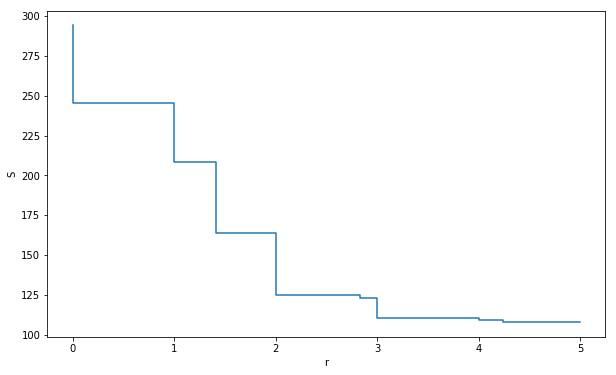

5069.604


In [17]:
# 第一个源

center = [236, 460]
S = [data[236, 460]]
r = [0]
S_sum = data[236, 460]

for i in range(1,6):
    S_new = (data[center[0]+i, center[1]] + data[center[0], center[1]+i]
            +data[center[0]-i, center[1]] + data[center[0], center[1]-i])/4
    S_sum += (data[center[0]+i, center[1]] + data[center[0], center[1]+i]
             +data[center[0]-i, center[1]] + data[center[0], center[1]-i])
    S.append(S_new)
    r.append(i)

for i in range(1,4):
    S_new = (data[center[0]+i, center[1]+i] + data[center[0]-i, center[1]+i]
            +data[center[0]-i, center[1]-i] + data[center[0]+i, center[1]-i])/4
    S_sum += (data[center[0]+i, center[1]+i] + data[center[0]-i, center[1]+i]
             +data[center[0]-i, center[1]-i] + data[center[0]+i, center[1]-i])
    S.append(S_new)
    r.append(i*(2**0.5))

r.sort()
S.sort(reverse=True)
fig = plt.figure(figsize=(10, 6))
ax=plt.subplot(111)
ax.step(r, S)
ax.set_xlabel('r')
ax.set_ylabel('S')
plt.show()

print(S_sum)